##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

In [1]:
import tensorflow as tf

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.5795586 ,  0.0231667 ,  0.11730185, -0.12221764, -0.33350673,
         0.5518442 , -0.19747642,  0.58640766,  0.3813243 , -0.02426722]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.16138417, 0.02442531, 0.10944721, 0.0627637 , 0.09662592,
        0.10375877, 0.18165185, 0.09847407, 0.04201527, 0.11945374]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

In [7]:
loss_fn(y_train[:1], predictions).numpy()

1.8554993

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2962 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1418 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1049 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0865 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0756 - accuracy: 0.9761


In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0693 - accuracy: 0.9797


[0.06928369402885437, 0.9797000288963318]

In [11]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [32]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.4841984e-09, 2.6260643e-09, 2.1869321e-06, 2.8835435e-05,
        7.8448142e-12, 2.5592277e-07, 1.0325580e-13, 9.9996805e-01,
        2.5427324e-08, 6.5305949e-07],
       [2.3261796e-06, 2.9771150e-05, 9.9990714e-01, 1.4886718e-05,
        4.5150592e-15, 4.1261588e-05, 1.7076147e-06, 1.7456489e-10,
        2.8288000e-06, 1.8299004e-12],
       [3.0907381e-07, 9.9933201e-01, 6.4856089e-05, 1.0497602e-05,
        3.4798955e-05, 4.9270788e-05, 4.5537422e-06, 4.8729332e-04,
        1.5150780e-05, 1.2007843e-06],
       [9.9977762e-01, 4.2711122e-08, 3.5360765e-05, 1.9693414e-07,
        1.2469634e-06, 4.9179803e-06, 7.6290657e-05, 6.6822016e-05,
        6.4644678e-07, 3.6867623e-05],
       [5.7247191e-05, 5.5523696e-08, 4.0669744e-05, 1.4585091e-06,
        9.9201667e-01, 6.2934660e-06, 6.9592602e-04, 5.1997288e-04,
        5.3384656e-06, 6.6563822e-03]], dtype=float32)>

In [19]:
import numpy as np

In [29]:
np.argmax(probability_model(x_test[:5])[3])

0

In [30]:
y_test[3]

0

In [47]:
import matplotlib
import matplotlib.pyplot as plt

def predict_image(i):
  print(np.argmax(probability_model(x_test)[i]))
  print(y_test[i])
  plt.imshow(x_test[i])

2
2


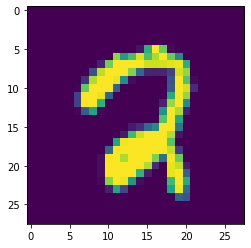

In [52]:
i=np.random.randint(0,10000,1).item()
predict_image(i)